# **A) Explore the dataset**

In [155]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import math
from statistics import mode
#import numpy as np

import scipy.stats as stats
#import pandas as pd

import collections 
import seaborn as sns

In [156]:
# read the csv file 
source_table = pd.read_csv("data_thefts.csv")

# print the first 5 rows of the data set
source_table.head()

,Unnamed: 0,robbbPerPop,pctWhite,kidsBornNevrMarr,pctKidsBornNevrMarr,pctUsePubTrans,pctBlack,pctKids2Par,pctFemDivorc,numForeignBorn,pctAllDivorc,pctForeignBorn,pct2Par,popDensity,pct12.17w2Par,persUrban,pctMaleDivorc,pctImmig.10
0,1,8.20,91.78,31,0.36,9.63,1.37,90.17,5.22,1277,4.47,10.66,91.43,1845.9,95.81,11980,3.67,3.30
1,2,21.26,95.57,43,0.24,3.84,0.80,85.33,6.45,1920,5.42,8.30,86.91,2186.7,86.46,23123,4.23,1.87
2,3,154.95,94.33,164,0.88,4.37,0.74,78.85,14.76,1468,12.55,5.00,78.54,2780.9,75.72,29344,10.10,1.78
3,4,57.86,97.35,561,3.84,3.31,1.70,62.36,14.47,339,12.91,2.04,64.02,3217.7,67.43,0,10.98,0.31
4,5,32.04,89.16,402,4.70,0.38,0.53,55.20,11.64,196,9.73,1.74,58.59,974.2,79.17,0,7.51,1.22


In [157]:
# shape of the dataframe
source_table.shape

# data type of each column
source_table.dtypes

# number of null values
source_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2213 entries, 0 to 2212
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2213 non-null   int64  
 1   robbbPerPop          2213 non-null   float64
 2   pctWhite             2213 non-null   float64
 3   kidsBornNevrMarr     2213 non-null   int64  
 4   pctKidsBornNevrMarr  2213 non-null   float64
 5   pctUsePubTrans       2213 non-null   float64
 6   pctBlack             2213 non-null   float64
 7   pctKids2Par          2213 non-null   float64
 8   pctFemDivorc         2213 non-null   float64
 9   numForeignBorn       2213 non-null   int64  
 10  pctAllDivorc         2213 non-null   float64
 11  pctForeignBorn       2213 non-null   float64
 12  pct2Par              2213 non-null   float64
 13  popDensity           2213 non-null   float64
 14  pct12.17w2Par        2213 non-null   float64
 15  persUrban            2213 non-null   i

In [158]:
# renaming columns pctImmig.10 and pctImmig.10
source_table.rename(columns = {'pct12.17w2Par':'pct12_17w2Par','pctImmig.10':'pctImmig_10'}, inplace = True)
source_table

,Unnamed: 0,robbbPerPop,pctWhite,kidsBornNevrMarr,pctKidsBornNevrMarr,pctUsePubTrans,pctBlack,pctKids2Par,pctFemDivorc,numForeignBorn,pctAllDivorc,pctForeignBorn,pct2Par,popDensity,pct12_17w2Par,persUrban,pctMaleDivorc,pctImmig_10
0,1,8.20,91.78,31,0.36,9.63,1.37,90.17,5.22,1277,4.47,10.66,91.43,1845.9,95.81,11980,3.67,3.30
1,2,21.26,95.57,43,0.24,3.84,0.80,85.33,6.45,1920,5.42,8.30,86.91,2186.7,86.46,23123,4.23,1.87
2,3,154.95,94.33,164,0.88,4.37,0.74,78.85,14.76,1468,12.55,5.00,78.54,2780.9,75.72,29344,10.10,1.78
3,4,57.86,97.35,561,3.84,3.31,1.70,62.36,14.47,339,12.91,2.04,64.02,3217.7,67.43,0,10.98,0.31
4,5,32.04,89.16,402,4.70,0.38,0.53,55.20,11.64,196,9.73,1.74,58.59,974.2,79.17,0,7.51,1.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,2211,199.50,61.68,1960,4.49,0.59,6.87,64.81,16.28,10623,13.34,18.90,67.04,3365.4,72.78,56216,10.22,11.40
2209,2212,8.27,76.65,277,2.98,1.15,21.18,63.66,16.12,275,13.77,2.24,68.57,1682.8,73.68,12251,10.86,1.70
2210,2213,65.32,92.62,434,1.60,0.12,0.52,74.20,12.38,2414,11.23,7.35,76.77,1195.2,82.42,32824,9.89,1.97
2211,2214,54.98,69.91,279,2.35,0.00,3.37,63.45,14.36,309,12.48,2.28,67.76,2142.2,74.12,0,10.35,0.47


#### In this section I am getting familiar with variables, their types and values. Variables "pct12.17w2Par" and "pctImmig.10" were renamed as "pct12_17w2Par" and "pctImmig_10" respectively.

## **1. Descriptive statistics**

# Mode

In [159]:
source_table.mode().count()

Unnamed: 0             2213
robbbPerPop               1
pctWhite                  1
kidsBornNevrMarr          1
pctKidsBornNevrMarr       1
pctUsePubTrans            1
pctBlack                  1
pctKids2Par               2
pctFemDivorc              2
numForeignBorn            1
pctAllDivorc              1
pctForeignBorn            4
pct2Par                   1
popDensity               53
pct12_17w2Par             3
persUrban                 1
pctMaleDivorc             1
pctImmig_10               1
dtype: int64

In [160]:
source_table['popDensity'].mode()

0      347.3
1      355.3
2      456.3
3      503.3
4      503.9
5      614.6
6      642.6
7      649.2
8      661.4
9      666.1
10     666.9
11     695.4
12     709.0
13     798.4
14     904.6
15     950.2
16    1046.0
17    1084.5
18    1118.3
19    1194.9
20    1356.3
21    1359.8
22    1361.6
23    1475.7
24    1558.0
25    1560.3
26    1610.3
27    1612.7
28    1617.6
29    1622.0
30    1641.4
31    1780.8
32    1793.9
33    1851.6
34    1925.8
35    2007.4
36    2078.7
37    2201.1
38    2241.3
39    2260.6
40    2278.3
41    2409.0
42    2530.4
43    2553.6
44    2685.8
45    2853.3
46    3024.3
47    3217.7
48    3283.8
49    3565.8
50    4012.2
51    5142.2
52    9728.3
Name: popDensity, dtype: float64

#### First I looked into the Mode. Most variables have just one mode. There are two variables having two modes and one variable having three and four ones. There are also 53 values in the popDensity having values in the interval 347 - 9.728.

# Median

In [161]:
source_table.median()

Unnamed: 0              1108.00
robbbPerPop               74.78
pctWhite                  90.35
kidsBornNevrMarr         352.00
pctKidsBornNevrMarr        2.04
pctUsePubTrans             1.22
pctBlack                   2.86
pctKids2Par               72.56
pctFemDivorc              12.52
numForeignBorn          1024.00
pctAllDivorc              10.89
pctForeignBorn             4.31
pct2Par                   75.03
popDensity              2027.30
pct12_17w2Par             76.92
persUrban              18041.00
pctMaleDivorc              9.14
pctImmig_10                1.31
dtype: float64

#### Median does not indicate any odd or any special values in variables.

# Descriptive metrics (mean, standard deviation, min, 25 %, 50 %, 75 % and max)

In [162]:
source_table[['Unnamed: 0',
'robbbPerPop',
'pctWhite',                    
'kidsBornNevrMarr',       
'pctKidsBornNevrMarr',        
'pctUsePubTrans',              
'pctBlack',                     
'pctKids2Par',                  
'pctFemDivorc',                 
'numForeignBorn',         
'pctAllDivorc',                 
'pctForeignBorn',              
'pct2Par',                     
'popDensity',               
'pct12_17w2Par',               
'persUrban',               
'pctMaleDivorc',                
'pctImmig_10']].describe(include='all').round(2)

,Unnamed: 0,robbbPerPop,pctWhite,kidsBornNevrMarr,pctKidsBornNevrMarr,pctUsePubTrans,pctBlack,pctKids2Par,pctFemDivorc,numForeignBorn,pctAllDivorc,pctForeignBorn,pct2Par,popDensity,pct12_17w2Par,persUrban,pctMaleDivorc,pctImmig_10
count,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00,2213.00
mean,1107.72,162.60,84.01,2107.27,3.11,3.04,9.31,71.24,12.32,6151.70,10.81,7.34,74.07,2784.39,75.54,47041.00,9.12,2.94
std,639.53,234.54,16.40,14610.60,3.12,4.91,14.22,12.04,3.26,55114.37,3.00,8.42,10.52,2830.12,10.36,202923.76,2.80,4.25
min,1.00,0.00,2.68,0.00,0.00,0.00,0.00,18.30,3.35,20.00,2.83,0.18,22.97,10.00,20.20,0.00,2.13,0.00
25%,554.00,27.64,76.37,147.00,1.07,0.36,0.86,64.02,9.86,400.00,8.57,2.06,67.94,1181.80,70.20,0.00,7.11,0.52
50%,1108.00,74.78,90.35,352.00,2.04,1.22,2.86,72.56,12.52,1024.00,10.89,4.31,75.03,2027.30,76.92,18041.00,9.14,1.31
75%,1661.00,187.16,96.23,1030.00,3.90,3.36,11.11,80.40,14.73,3297.00,12.97,9.25,81.90,3322.80,82.78,41891.00,11.05,3.44
max,2215.00,2264.13,99.63,527557.00,27.35,54.33,96.67,92.58,23.92,2082931.00,22.23,60.40,93.60,44229.90,97.34,7322564.00,20.08,32.63


#### In the dataset some variables have absolute and some relative values. It seems there are some rows having the minimal value of 0.00 so these rows are going to be removed from the model as it seems that data is missing.

## Cleaning the dataset

In [163]:
source_table_clean = source_table.replace(0,np.nan).dropna(axis = 0, how = 'any')
source_table_clean

,Unnamed: 0,robbbPerPop,pctWhite,kidsBornNevrMarr,pctKidsBornNevrMarr,pctUsePubTrans,pctBlack,pctKids2Par,pctFemDivorc,numForeignBorn,pctAllDivorc,pctForeignBorn,pct2Par,popDensity,pct12_17w2Par,persUrban,pctMaleDivorc,pctImmig_10
0,1,8.20,91.78,31.0,0.36,9.63,1.37,90.17,5.22,1277,4.47,10.66,91.43,1845.9,95.81,11980.0,3.67,3.30
1,2,21.26,95.57,43.0,0.24,3.84,0.80,85.33,6.45,1920,5.42,8.30,86.91,2186.7,86.46,23123.0,4.23,1.87
2,3,154.95,94.33,164.0,0.88,4.37,0.74,78.85,14.76,1468,12.55,5.00,78.54,2780.9,75.72,29344.0,10.10,1.78
5,6,90.05,95.65,1511.0,1.58,0.97,2.51,69.79,14.46,2091,13.04,1.49,71.94,1995.7,75.33,140494.0,11.40,0.68
6,7,30.44,96.57,263.0,1.18,9.62,1.60,79.76,9.06,2637,7.64,9.19,79.53,2643.5,77.12,28700.0,5.97,2.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,2210,28.47,98.48,88.0,1.12,1.22,0.18,73.53,9.29,693,8.98,6.56,76.36,4109.8,73.45,10567.0,8.65,1.78
2208,2211,199.50,61.68,1960.0,4.49,0.59,6.87,64.81,16.28,10623,13.34,18.90,67.04,3365.4,72.78,56216.0,10.22,11.40
2209,2212,8.27,76.65,277.0,2.98,1.15,21.18,63.66,16.12,275,13.77,2.24,68.57,1682.8,73.68,12251.0,10.86,1.70
2210,2213,65.32,92.62,434.0,1.60,0.12,0.52,74.20,12.38,2414,11.23,7.35,76.77,1195.2,82.42,32824.0,9.89,1.97


#### Rows having the value 0 were removed as it is considered that data is missing. 

## **2. Correlation matrix**

In [164]:
# identification of variables dependent on "robbbPerPop"
corr = source_table_clean.corr(method = 'pearson')
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,robbbPerPop,pctWhite,kidsBornNevrMarr,pctKidsBornNevrMarr,pctUsePubTrans,pctBlack,pctKids2Par,pctFemDivorc,numForeignBorn,pctAllDivorc,pctForeignBorn,pct2Par,popDensity,pct12_17w2Par,persUrban,pctMaleDivorc,pctImmig_10
Unnamed: 0,1.000000,-0.038538,0.021885,-0.057645,-0.024698,-0.032930,-0.038105,0.004183,0.006379,-0.053235,0.012698,0.028153,0.010619,-0.033456,0.023779,-0.056354,0.019734,0.011800
robbbPerPop,-0.038538,1.000000,-0.757760,0.359511,0.816191,0.370483,0.693703,-0.749838,0.533952,0.226969,0.535138,0.302521,-0.729398,0.419955,-0.711000,0.309669,0.515444,0.360414
pctWhite,0.021885,-0.757760,1.000000,-0.238905,-0.803051,-0.292106,-0.821238,0.723357,-0.503929,-0.143336,-0.474631,-0.392669,0.672436,-0.366774,0.645858,-0.202214,-0.420511,-0.465299
kidsBornNevrMarr,-0.057645,0.359511,-0.238905,1.000000,0.291275,0.355798,0.224628,-0.237325,0.139210,0.886381,0.137026,0.090793,-0.231833,0.229038,-0.222885,0.965265,0.127677,0.108968
pctKidsBornNevrMarr,-0.024698,0.816191,-0.803051,0.291275,1.000000,0.313687,0.805418,-0.888090,0.569631,0.135670,0.577958,0.150686,-0.870733,0.357558,-0.837177,0.223547,0.561664,0.237487
pctUsePubTrans,-0.032930,0.370483,-0.292106,0.355798,0.313687,1.000000,0.248347,-0.191843,-0.003863,0.289678,-0.011946,0.342623,-0.200951,0.600636,-0.213349,0.319984,-0.027855,0.321362
pctBlack,-0.038105,0.693703,-0.821238,0.224628,0.805418,0.248347,1.000000,-0.742488,0.480880,0.058771,0.490536,-0.076279,-0.719532,0.142047,-0.712423,0.155329,0.471526,-0.008796
pctKids2Par,0.004183,-0.749838,0.723357,-0.237325,-0.888090,-0.191843,-0.742488,1.000000,-0.766234,-0.102828,-0.783089,-0.081752,0.987568,-0.311670,0.929217,-0.193801,-0.767437,-0.171619
pctFemDivorc,0.006379,0.533952,-0.503929,0.139210,0.569631,-0.003863,0.480880,-0.766234,1.000000,0.063134,0.986827,0.026555,-0.783430,0.185350,-0.732936,0.144616,0.935619,0.132282
numForeignBorn,-0.053235,0.226969,-0.143336,0.886381,0.135670,0.289678,0.058771,-0.102828,0.063134,1.000000,0.051468,0.202856,-0.092877,0.227071,-0.085199,0.930345,0.037094,0.214684


In [165]:
# identification of variables dependent on "robbbPerPop"
corr = source_table_clean.corr(method = 'spearman')
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,robbbPerPop,pctWhite,kidsBornNevrMarr,pctKidsBornNevrMarr,pctUsePubTrans,pctBlack,pctKids2Par,pctFemDivorc,numForeignBorn,pctAllDivorc,pctForeignBorn,pct2Par,popDensity,pct12_17w2Par,persUrban,pctMaleDivorc,pctImmig_10
Unnamed: 0,1.000000,-0.020409,0.020136,-0.014446,-0.018472,-0.017518,-0.039526,0.001832,0.010247,0.013229,0.014180,0.038497,0.008301,-0.028738,0.023323,-0.022558,0.018697,0.025299
robbbPerPop,-0.020409,1.000000,-0.762444,0.751686,0.772306,0.218924,0.678476,-0.794553,0.679103,0.423771,0.670235,0.201643,-0.766006,0.444078,-0.727049,0.483768,0.633589,0.311866
pctWhite,0.020136,-0.762444,1.000000,-0.706591,-0.746653,-0.242842,-0.794072,0.668958,-0.560412,-0.500112,-0.525924,-0.333595,0.614450,-0.361439,0.598595,-0.458799,-0.468546,-0.488301
kidsBornNevrMarr,-0.014446,0.751686,-0.706591,1.000000,0.891748,0.173534,0.622410,-0.815000,0.663937,0.537253,0.659834,0.105218,-0.794980,0.330324,-0.730773,0.787702,0.632724,0.261377
pctKidsBornNevrMarr,-0.018472,0.772306,-0.746653,0.891748,1.000000,0.186861,0.706966,-0.900203,0.689900,0.297882,0.693545,0.038329,-0.879583,0.317900,-0.811956,0.457298,0.672829,0.198108
pctUsePubTrans,-0.017518,0.218924,-0.242842,0.173534,0.186861,1.000000,0.159564,-0.111604,-0.014499,0.379559,-0.028500,0.398073,-0.123939,0.513500,-0.144434,0.158245,-0.047539,0.393555
pctBlack,-0.039526,0.678476,-0.794072,0.622410,0.706966,0.159564,1.000000,-0.642677,0.521216,0.197982,0.523198,-0.007889,-0.614300,0.164788,-0.606829,0.340649,0.503520,0.132588
pctKids2Par,0.001832,-0.794553,0.668958,-0.815000,-0.900203,-0.111604,-0.642677,1.000000,-0.803765,-0.223970,-0.816047,0.028291,0.985344,-0.343842,0.906927,-0.418776,-0.797090,-0.116643
pctFemDivorc,0.010247,0.679103,-0.560412,0.663937,0.689900,-0.014499,0.521216,-0.803765,1.000000,0.188360,0.987169,-0.062308,-0.821481,0.256953,-0.769052,0.398002,0.938197,0.108878
numForeignBorn,0.013229,0.423771,-0.500112,0.537253,0.297882,0.379559,0.197982,-0.223970,0.188360,1.000000,0.145882,0.795475,-0.191554,0.468862,-0.199314,0.722856,0.098535,0.813662


#### Variables having the strong correlation (ca 0.7 <) with the variable robbbPerPop calculated with both Pearson and Spearman coeficient of correlation are as follows:
    - pctWhite ((-) negative corr - the more white people the less robberies per population)
    
    - kidsBornNevrMarr ((+) positive corr - the more kids born to unmarried couples the more robberies per population). Very high correlation applies on Spearman coefficient only. The coefficient is 0.36 in case of Paerson coefficient
    
    - pctKidsBornNevrMarr ((+) positive corr - the more kids born to unmarried couples the more robberies per population)
    
    - pctBlack ((+) positive corr - the more black people in the ares the more robberies per population)
    
    - pctKids2Par ((-) negative corr - the more kids with two parents the less robberies per population)
    
    - pctAllDivorc ((+) positive corr - the more divorced people the more robberies per population). High correlation of 0.67 applies on Spearman coefficient only whereas Pearson coefficient is 0.54 only.
    
    - pct2Par ((-) negative corr - the more families with two parents the less robberies per population)
    
    - pct12_17w2Par ((-) negative corr - the more families with kids age 12-17 in two parent households the less robberies per population)
    
All these variables will be considered for the regression model.

In [166]:
# table of the variable robbbPerPop and variables strongly dependent on the variable robbbPerPop
ind_var = source_table_clean[['pctWhite', 'kidsBornNevrMarr', 'pctKidsBornNevrMarr', 'pctBlack', 'pctKids2Par','pctAllDivorc', 'pct2Par','pct12_17w2Par']]
ind_var

,pctWhite,kidsBornNevrMarr,pctKidsBornNevrMarr,pctBlack,pctKids2Par,pctAllDivorc,pct2Par,pct12_17w2Par
0,91.78,31.0,0.36,1.37,90.17,4.47,91.43,95.81
1,95.57,43.0,0.24,0.80,85.33,5.42,86.91,86.46
2,94.33,164.0,0.88,0.74,78.85,12.55,78.54,75.72
5,95.65,1511.0,1.58,2.51,69.79,13.04,71.94,75.33
6,96.57,263.0,1.18,1.60,79.76,7.64,79.53,77.12
...,...,...,...,...,...,...,...,...
2207,98.48,88.0,1.12,0.18,73.53,8.98,76.36,73.45
2208,61.68,1960.0,4.49,6.87,64.81,13.34,67.04,72.78
2209,76.65,277.0,2.98,21.18,63.66,13.77,68.57,73.68
2210,92.62,434.0,1.60,0.52,74.20,11.23,76.77,82.42


In [167]:
# Pearson coefficient of correlation among variables strongly correlated with robbbPerPop
corr_ind_var = ind_var.corr(method = 'pearson')
corr_ind_var.style.background_gradient(cmap='coolwarm')

,pctWhite,kidsBornNevrMarr,pctKidsBornNevrMarr,pctBlack,pctKids2Par,pctAllDivorc,pct2Par,pct12_17w2Par
pctWhite,1.000000,-0.238905,-0.803051,-0.821238,0.723357,-0.474631,0.672436,0.645858
kidsBornNevrMarr,-0.238905,1.000000,0.291275,0.224628,-0.237325,0.137026,-0.231833,-0.222885
pctKidsBornNevrMarr,-0.803051,0.291275,1.000000,0.805418,-0.888090,0.577958,-0.870733,-0.837177
pctBlack,-0.821238,0.224628,0.805418,1.000000,-0.742488,0.490536,-0.719532,-0.712423
pctKids2Par,0.723357,-0.237325,-0.888090,-0.742488,1.000000,-0.783089,0.987568,0.929217
pctAllDivorc,-0.474631,0.137026,0.577958,0.490536,-0.783089,1.000000,-0.801943,-0.748877
pct2Par,0.672436,-0.231833,-0.870733,-0.719532,0.987568,-0.801943,1.000000,0.939317
pct12_17w2Par,0.645858,-0.222885,-0.837177,-0.712423,0.929217,-0.748877,0.939317,1.000000


In [168]:
# Spearman coefficient of correlation among variables strongly correlated with robbbPerPop
corr_ind_var = ind_var.corr(method = 'spearman')
corr_ind_var.style.background_gradient(cmap='coolwarm')

,pctWhite,kidsBornNevrMarr,pctKidsBornNevrMarr,pctBlack,pctKids2Par,pctAllDivorc,pct2Par,pct12_17w2Par
pctWhite,1.000000,-0.706591,-0.746653,-0.794072,0.668958,-0.525924,0.614450,0.598595
kidsBornNevrMarr,-0.706591,1.000000,0.891748,0.622410,-0.815000,0.659834,-0.794980,-0.730773
pctKidsBornNevrMarr,-0.746653,0.891748,1.000000,0.706966,-0.900203,0.693545,-0.879583,-0.811956
pctBlack,-0.794072,0.622410,0.706966,1.000000,-0.642677,0.523198,-0.614300,-0.606829
pctKids2Par,0.668958,-0.815000,-0.900203,-0.642677,1.000000,-0.816047,0.985344,0.906927
pctAllDivorc,-0.525924,0.659834,0.693545,0.523198,-0.816047,1.000000,-0.835455,-0.778614
pct2Par,0.614450,-0.794980,-0.879583,-0.614300,0.985344,-0.835455,1.000000,0.919751
pct12_17w2Par,0.598595,-0.730773,-0.811956,-0.606829,0.906927,-0.778614,0.919751,1.000000


#### Following variables were selected for regression model:
    - pctWhite
    - kidsBornNevrMarr
    - pctBlack
    - pctAllDivorc	
    - pct12_17w2Par    

## 3. Visualization of data

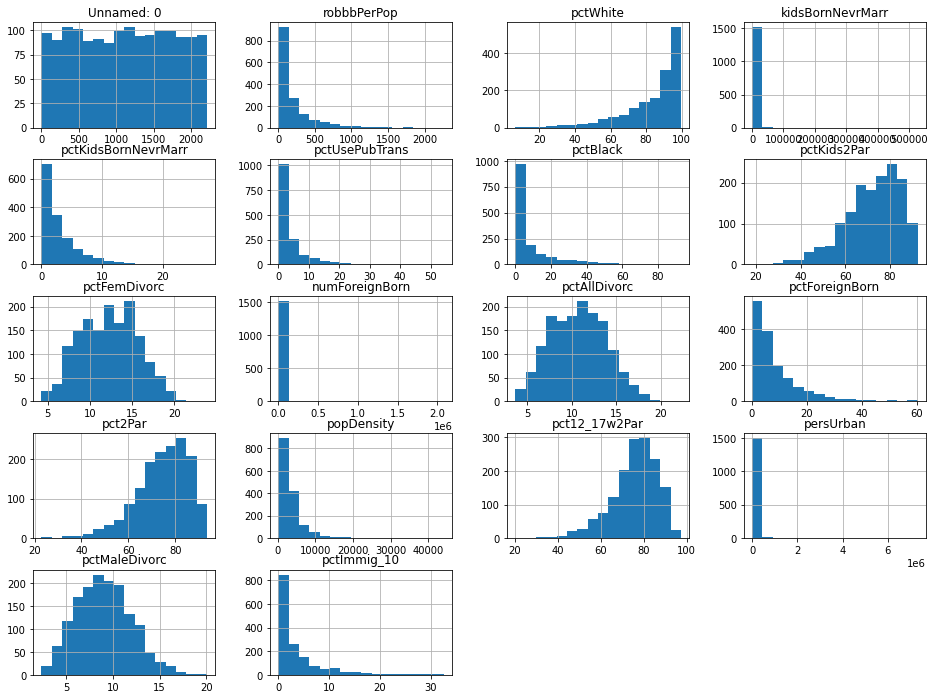

In [169]:
import pandas as pd
import matplotlib.pyplot as pt

hist = source_table_clean.hist(bins=16,figsize=(16,12))

#### The histograms of the variable robbbPerPop indicates that the distribution is not normal but left sided. More less normal distribution is available in case of three variables of divorce, pct2Par,  pctKids2Par and pct12_17w2Par.

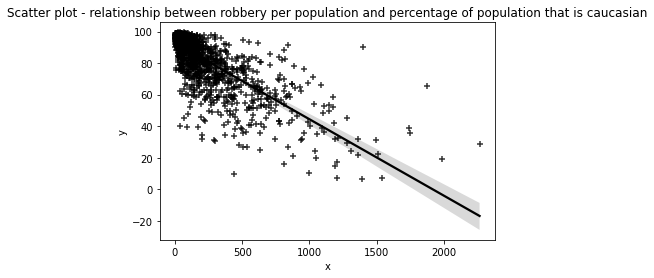

In [170]:
x = source_table_clean['robbbPerPop']
y = source_table_clean['pctWhite']
colors = 'k'
area = np.pi*3

# Plot
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
sns.regplot(x=x, y=y, color='black', marker='+')
plt.title('Scatter plot - relationship between robbery per population and percentage of population that is caucasian')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### This visualisation indicates the higher percentage of White people the less robberies

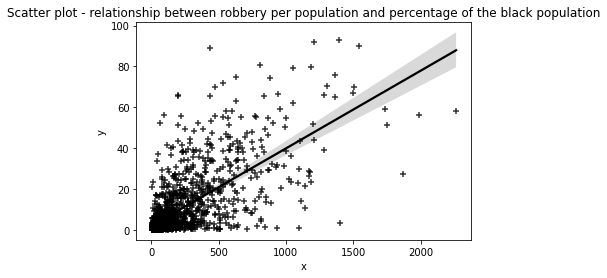

In [171]:
x = source_table_clean['robbbPerPop']
y = source_table_clean['pctBlack']
colors = 'k'
area = np.pi*3

# Plot
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
sns.regplot(x=x, y=y, color='black', marker='+')
plt.title('Scatter plot - relationship between robbery per population and percentage of the black population')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [172]:
#### This visualisation indicates the higher percentage of Black people the more robberies

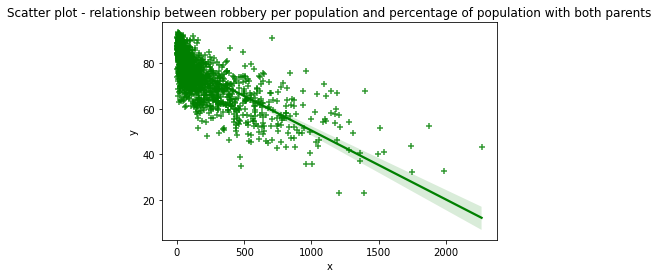

In [173]:
x = source_table_clean['robbbPerPop']
y = source_table_clean['pct2Par']
colors = 'g'
area = np.pi*3

# Plot
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
sns.regplot(x=x, y=y, color='green', marker='+')
plt.title('Scatter plot - relationship between robbery per population and percentage of population with both parents')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Also in this case is being indicated that the higher percentage of population with both parents in families the less robberies.

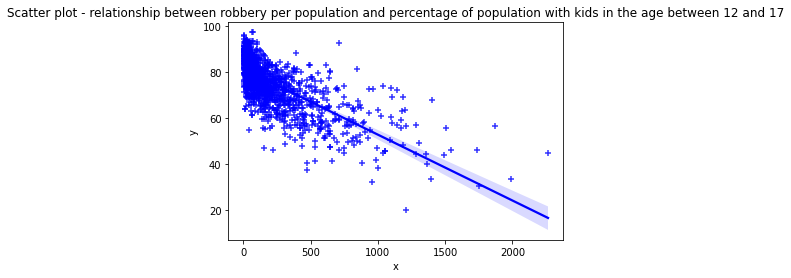

In [174]:
x = source_table_clean['robbbPerPop']
y = source_table_clean['pct12_17w2Par']
colors = 'b'
area = np.pi*3

# Plot
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
sns.regplot(x=x, y=y, color='blue', marker='+')
plt.title('Scatter plot - relationship between robbery per population and percentage of population with kids in the age between 12 and 17')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### The relationship between robberies and population with kids in the age between 12 and 17 also indicates the negative relationship between them.

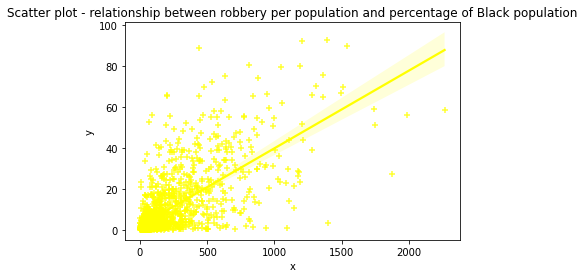

In [175]:
x = source_table_clean['robbbPerPop']
y = source_table_clean['pctBlack']
colors = 'y'
area = np.pi*3

# Plot
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
sns.regplot(x=x, y=y, color='yellow', marker='+')
plt.title('Scatter plot - relationship between robbery per population and percentage of Black population')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### This relationship shows the possible positive relationship between robberies and the percentage of Black people in the area

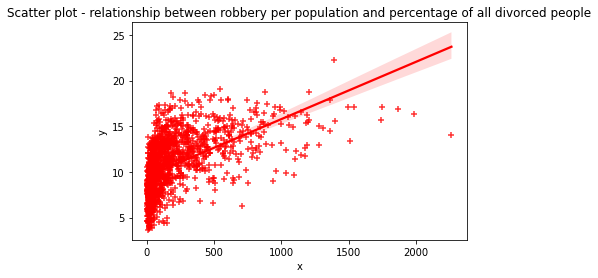

In [176]:
x = source_table_clean['robbbPerPop']
y = source_table_clean['pctAllDivorc']
colors = 'y'
area = np.pi*3

# Plot
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
sns.regplot(x=x, y=y, color='red', marker='+')
plt.title('Scatter plot - relationship between robbery per population and percentage of all divorced people')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### This relationship also shows the positive relationship between robberies and the percentage of all divorced people in the area - the higher rate of divorced people the higher rate of robberies per population.

# B) Start modelling

## 1. Variables

#### When working on the model we consider the strength of the regressor on dependent variable as well as the strength of the correlation between regressors themselves (the lower the better). In this respect following variables were selected as regressors into the model.

#### Variables that I would intuitively select are those on divorce (positive impact on robberies), pctBlack (negative impact on robberies), pctWhite (positive impact on robberies) as well as ones on households with two parents (negatibe impact on robberies).

#### As highlighted above in the end of the section 2. Correlation matrix following variables were selected for the model. They are strongly correleated with dependent variable and relatively low still high correlation between each other:
    - pctWhite
    - kidsBornNevrMarr
    - pctAllDivorc    
    - pct12_17w2Par       

## 2. Fitting the model

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn import linear_model
import researchpy as rp
import statsmodels as sm

In [178]:
# dependent variable
y = source_table_clean['robbbPerPop']
y

0         8.20
1        21.26
2       154.95
5        90.05
6        30.44
         ...  
2207     28.47
2208    199.50
2209      8.27
2210     65.32
2212    337.15
Name: robbbPerPop, Length: 1528, dtype: float64

In [179]:
# regressors
x = source_table_clean[['pctWhite', 'pct12_17w2Par', 'kidsBornNevrMarr', 'pctAllDivorc']]
x

,pctWhite,pct12_17w2Par,kidsBornNevrMarr,pctAllDivorc
0,91.78,95.81,31.0,4.47
1,95.57,86.46,43.0,5.42
2,94.33,75.72,164.0,12.55
5,95.65,75.33,1511.0,13.04
6,96.57,77.12,263.0,7.64
...,...,...,...,...
2207,98.48,73.45,88.0,8.98
2208,61.68,72.78,1960.0,13.34
2209,76.65,73.68,277.0,13.77
2210,92.62,82.42,434.0,11.23


In [180]:
import statsmodels.api as sm

metoda = sm.OLS(y, x)
regr = metoda.fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            robbbPerPop   R-squared (uncentered):                   0.716
Model:                            OLS   Adj. R-squared (uncentered):              0.716
Method:                 Least Squares   F-statistic:                              961.9
Date:                Mon, 20 Jun 2022   Prob (F-statistic):                        0.00
Time:                        21:43:46   Log-Likelihood:                         -10075.
No. Observations:                1528   AIC:                                  2.016e+04
Df Residuals:                    1524   BIC:                                  2.018e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
pctWhite            -7.3562      0.352    -20.916      0.000      -8.046      -6.666
pct12_17w2Par        4.4842      0.405     11.062      0.000       3.689       5.279
kidsBornNevrMarr     0.0034      0.000     12.799      0.000       0.003       0.004
pctAllDivorc        42.3807      1.068     39.680      0.000      40.286      44.476
==============================================================================
Omnibus:                      742.070   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8943.189
Skew:                           1.958   Prob(JB):                         0.00
Kurtosis:                      14.186   Cond. No.                     4.22e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# C) Interpret the results

## 1. Does the model make sense?
#### Yes, the model makes sense to me.

## 2. What is the explanatory power of the model?
#### Coefficient of determination is high 0.681 so it indictes that regression model explains dependent variable robberies from about 68 %.

    - Zero values were considered as missing data so respective rows were removed. The used dataset was therefore smaller than the original one.  
 
    - I tried to use regressors having very strong correlation with dependent variable and also relatively low correlation between each other.
    
    - It was quite a chalange to find convenient regressors.
        

## 3. Which variables are statistically significant at 5% level?
#### It seems that no regressor is statistically significant at 5 % level. Frankly I do not know what to do with it.

## 4. Select three variables and try to interpret their coefficients.
#### 
    pctWhite - coefficient = -0.5122	
    pct12_17w2Par - coefficient = 0.3556
    kidsBornNevrMarr - coefficient = 6.412e-05 
    pctAllDivorc - coefficient = 2.2886
    
    In case the number of people with caucasian origin increases by 1 pct point, the robbery will decrease by -0.5122 pct points. The other regressors have positive impact on robbery so in case they increase by 1 pct point, the robbery will also increase. The extend of their increase however differs. The highest decrease would be in case of the regressor of pctAllDivor followed by pct12_17w2Par. The increase is very low in case of the regressor of kidsBornNevrMarr.   

# D) Test the assumptions

## 1. Check your model residuals. Plot them and see if they are approximately normally distributed. 

C:\Users\sonao\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


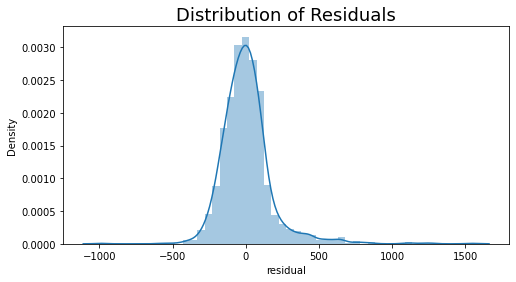

In [181]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
source_table_clean['residual'] = sm.OLS(y, x).fit().resid
source_table_clean.head()

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(source_table_clean['residual'])
plt.show()


#### It is obvious from the output that the distribution of residuals is normal.

## 2. Does homoskedasticity assumption hold? Use at least one statistical test to check it and interpret the test result. You can also try to plot the residuals vs. fitted values from your model to see if with increasing (fitted) y, the residuals variability increases. That could indicate that we have heteroskedasticity problem in our model.

In [182]:
from statsmodels.stats.diagnostic import het_white

#perform White's test
white_test = het_white(regr.resid, regr.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

AssertionError: 

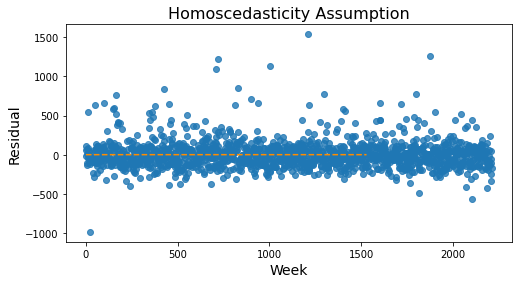

In [183]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=source_table_clean.index, y=source_table_clean.residual, alpha=0.8)
plt.plot(np.repeat(0, len(source_table_clean.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('Week', fontsize=14)
plt.title('Homoscedasticity Assumption', fontsize=16)
plt.show()  

#### It seems there is the homoskedasticity in the model as there is not even variance across the error terms (residuals).

## 3. If the homoskedasticity assumption does not hold, try to use heteroskedasticity-robust standard errors. How did it change your results (beta estimates and variable significances)?

#### Homoscedasticity assumption holds so the heteroskedasticity-robust standard errors do not apply

## 4. Double-check if there is no multicollinearity problem in your model by calculating variance inflation factor for each variable in the model. Was there any variable for which the VIF is too large?

In [184]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

            feature        VIF
0          pctWhite  43.593127
1     pct12_17w2Par  46.968685
2  kidsBornNevrMarr   1.071954
3      pctAllDivorc   6.977645


#### It seems that pctWhite, pct12_17w2Pa have very high values of VIF which indicates multicollinearity in the model. 